##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------

***Team number:9***

---

***Full names of all students in the team: Ananya Jain , Tarun Raman , Jayesh Totlani ,Siddharth Dixit***

---

***Id number of all students in the team:2021AAPS2121H , 2021AAPS2308H , 2021AAPS1815H , 2019HS030546H***

This assignment aims to identify the differences between three Machine Learning models.

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

### Importing libraries

In [87]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import csv

##creating csv from data files

.data aur .names se convert kia preprocess kia hai aur ? wagre nikala hai

In [88]:
# Function to read a file
def read_file(file_path):
    with open(file_path, 'r') as file:
        contents = file.readlines()
    return contents

# Extract headers from 'communities.names'
def extract_headers(contents):
    header_start_index = contents.index('.arff header for Weka:\n') + 2
    return [line.split(' ')[1] for line in contents[header_start_index:] if line.startswith('@attribute')]

headers = extract_headers(read_file('/content/communities.names'))
data_rows = read_file('/content/communities.data')

data_rows = [row.strip().split(',') for row in data_rows]

data_rows.insert(0, headers)

# Write to CSV file
csv_file_path = '/content/modified_communities.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_rows)

df = pd.read_csv(csv_file_path)
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


### Handling missing values

In [89]:
#Dropping columns which have more than half missing values.
col_names=list(df.columns)
unknown_cols=[]
c=0
for i in col_names:
  if (np.count_nonzero(df[i].values=='?'))>df[i].values.size/2:
    unknown_cols.append(i)
    col_names.pop(c)
  c+=1

df = df.drop(columns=unknown_cols)
df.head()

<ipython-input-89-71847cddf858>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (np.count_nonzero(df[i].values=='?'))>df[i].values.size/2:


,state,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PctPolicHisp,PctPolicMinor,NumKindsDrugsSeiz,LandArea,PopDens,PctUsePubTrans,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.07,0.07,0.57,0.12,0.26,0.20,0.04,0.5,0.32,0.20
1,53,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,...,?,?,?,0.02,0.12,0.45,?,?,0.00,0.67
2,24,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,...,?,?,?,0.01,0.21,0.02,?,?,0.00,0.43
3,34,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,...,?,?,?,0.02,0.39,0.28,?,?,0.00,0.12
4,42,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,...,?,?,?,0.04,0.09,0.02,?,?,0.00,0.03


In [90]:
#Replacing missing values with the average value of their respective columns
unknown_cols=[]
for i in col_names:
  if (np.count_nonzero(df[i].values=='?'))>0:
    unknown_cols.append(i)


def fill_empty(col):
  avg=np.mean((df[df[col].values!='?'][col].values).astype(float))
  df[col]=df[col].replace("?",avg)
  df[col]=df[col].values.astype(float)

for i in unknown_cols:
  fill_empty(i)

df=df.drop("communityname",axis=1)
df.head()

<ipython-input-90-d496a3a26af3>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (np.count_nonzero(df[i].values=='?'))>0:


,state,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctPolicHisp,PctPolicMinor,NumKindsDrugsSeiz,LandArea,PopDens,PctUsePubTrans,PolicOperBudg,LemasGangUnitDeploy,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,46188.336597,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.070000,0.070000,0.57000,0.12,0.26,0.20,0.040000,0.500000,0.32,0.20
1,53,46188.336597,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.134859,0.259185,0.55605,0.02,0.12,0.45,0.076708,0.440439,0.00,0.67
2,24,46188.336597,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.134859,0.259185,0.55605,0.01,0.21,0.02,0.076708,0.440439,0.00,0.43
3,34,81440.000000,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.134859,0.259185,0.55605,0.02,0.39,0.28,0.076708,0.440439,0.00,0.12
4,42,6096.000000,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.134859,0.259185,0.55605,0.04,0.09,0.02,0.076708,0.440439,0.00,0.03


### Feature selection based on threshold

In [91]:
c=0
col_names=list(df.columns)
drop_col=[]
for i in df.corr()['ViolentCrimesPerPop']:
    if (abs(i)<0.25):
        drop_col.append(col_names[c])
    c+=1

drop_col

['state',
 'community',
 'fold',
 'householdsize',
 'racePctAsian',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'pctUrban',
 'pctWFarmSelf',
 'pctWSocSec',
 'pctWRetire',
 'whitePerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctEmplManu',
 'PctEmplProfServ',
 'PersPerFam',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctSpeakEnglOnly',
 'PersPerOccupHous',
 'PersPerOwnOccHous',
 'PersPerRentOccHous',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'OwnOccHiQuart',
 'RentMedian',
 'RentHighQ',
 'MedRent',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'PctForeignBorn',
 'PctBornSameState',
 'PctSameHouse85',
 'PctSameCity85',
 'PctSameState85',
 'LemasSwFTPerPop',
 'LemasSwFTFieldPerPop',
 'LemasTotReqPerPop',
 'PolicPerPop',
 'PctPolicWhite',
 'PctPolicHisp',
 'PctPolicMinor',
 'NumKindsDrugsSeiz',
 'LandArea',
 'PctUsePubTrans

In [92]:
df = df.drop(columns=drop_col)
df.head()

,population,racepctblack,racePctWhite,racePctHisp,numbUrban,medIncome,pctWWage,pctWInvInc,pctWPubAsst,medFamInc,...,PctVacantBoarded,PctHousNoPhone,PctWOFullPlumb,RentLowQ,MedRentPctHousInc,NumInShelters,NumStreet,PopDens,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.02,0.90,0.17,0.20,0.37,0.72,0.60,0.15,0.39,...,0.05,0.14,0.06,0.36,0.38,0.04,0.0,0.26,0.32,0.20
1,0.00,0.12,0.74,0.07,0.02,0.31,0.72,0.45,0.29,0.29,...,0.02,0.16,0.00,0.42,0.29,0.00,0.0,0.12,0.00,0.67
2,0.00,0.49,0.56,0.04,0.00,0.30,0.58,0.39,0.40,0.28,...,0.29,0.47,0.45,0.27,0.48,0.00,0.0,0.21,0.00,0.43
3,0.04,1.00,0.08,0.10,0.06,0.58,0.89,0.43,0.20,0.51,...,0.60,0.11,0.11,0.75,0.63,0.00,0.0,0.39,0.00,0.12
4,0.01,0.02,0.95,0.05,0.02,0.50,0.72,0.68,0.11,0.46,...,0.04,0.05,0.14,0.40,0.22,0.00,0.0,0.09,0.00,0.03


### Finding correlation

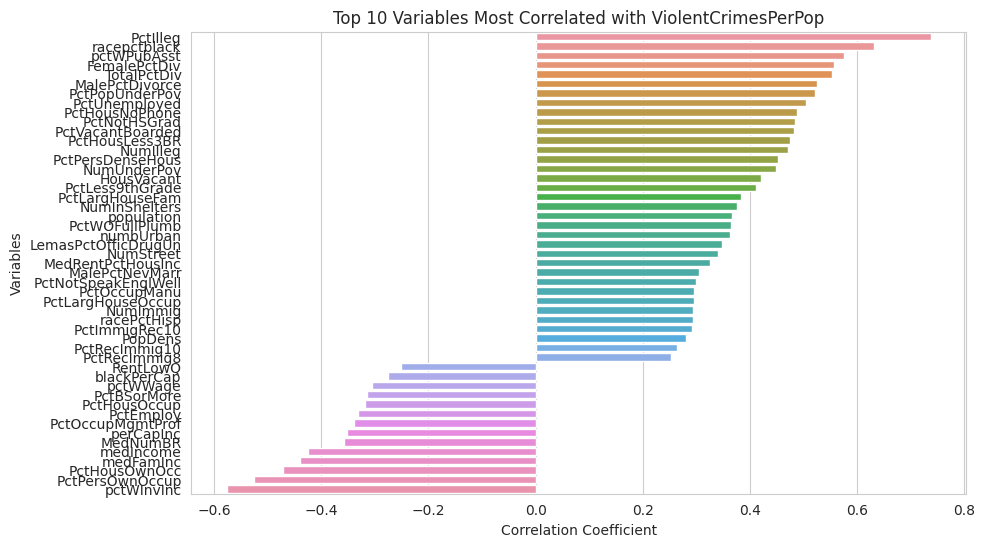

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix['ViolentCrimesPerPop'].sort_values(ascending=False)
top_correlations = correlations_with_target[1:50]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Top 10 Variables Most Correlated with ViolentCrimesPerPop')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()


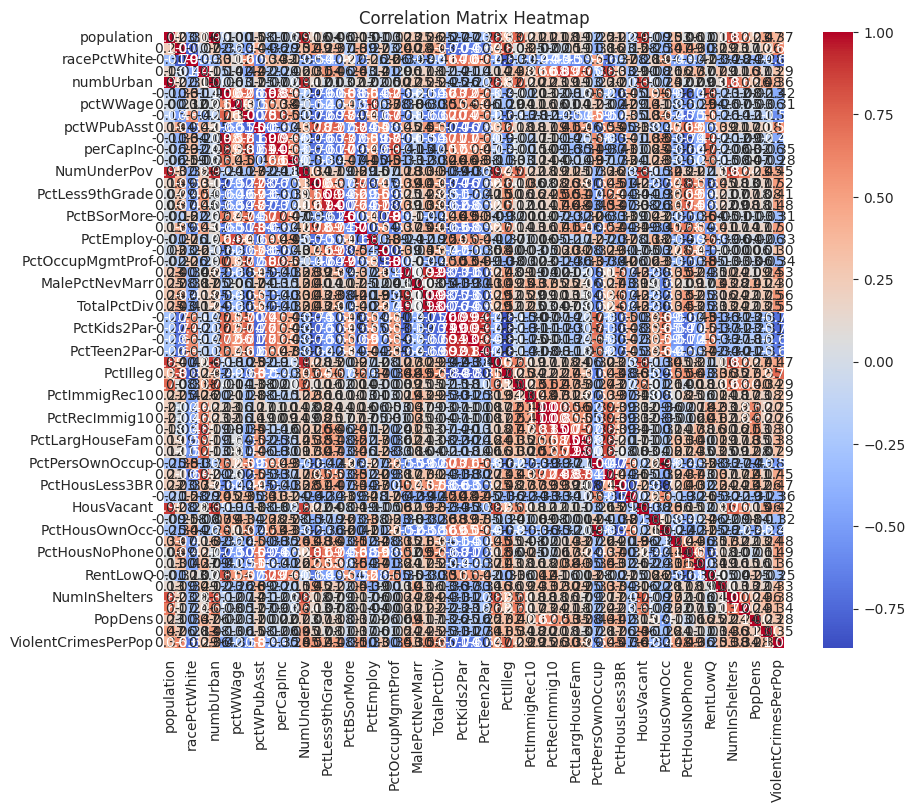

In [94]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### PCA

In [95]:
def pca(X, num_components):
    # Standardize the data
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]

    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced


In [96]:
X=df.iloc[:,:54]
y=df.iloc[:,54]


In [97]:
X_pca=pca(X,10)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df_pca['target'] = y

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,0.340576,0.116680,0.447983,0.189307,0.342902,0.263668,-0.014296,-0.153679,-0.084818,0.124697,0.20
1,-0.247025,0.044457,0.557345,0.749946,-0.060469,0.713890,0.044427,-0.205688,0.125483,0.044297,0.67
2,-0.463836,0.433196,0.149326,-0.206705,-0.161034,0.470869,-0.007875,0.122728,0.068534,-0.062950,0.43
3,0.282474,-0.283419,0.137694,-1.214064,-0.225181,0.571643,0.051936,0.070752,0.244319,0.367659,0.12
4,1.111989,0.176606,-0.389374,-0.193213,0.149274,0.034039,0.184569,0.080741,-0.084757,-0.099102,0.03


In [98]:
def label(row):
    if (row<=0.3):
      return 1
    elif (row<=0.7):
      return 2
    else:
      return 3

df_pca['target']=df_pca['target'].apply(lambda x:label(x))

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,0.340576,0.116680,0.447983,0.189307,0.342902,0.263668,-0.014296,-0.153679,-0.084818,0.124697,1
1,-0.247025,0.044457,0.557345,0.749946,-0.060469,0.713890,0.044427,-0.205688,0.125483,0.044297,2
2,-0.463836,0.433196,0.149326,-0.206705,-0.161034,0.470869,-0.007875,0.122728,0.068534,-0.062950,2
3,0.282474,-0.283419,0.137694,-1.214064,-0.225181,0.571643,0.051936,0.070752,0.244319,0.367659,1
4,1.111989,0.176606,-0.389374,-0.193213,0.149274,0.034039,0.184569,0.080741,-0.084757,-0.099102,1


In [99]:
l=len(df_pca)
l=int(l*0.8)

X_train=df_pca.iloc[:l,:-1]
X_test=df_pca.iloc[l:,:-1]
y_train=df_pca.iloc[:l,-1]
y_test=df_pca.iloc[l:,-1]

train_df=df_pca.iloc[:l,:]
test_df=df_pca.iloc[l:,:]

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

In [100]:
class DecisionTreeClassifier:
    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index  # Index of the feature to split on
            self.threshold = threshold  # Threshold value to split the feature
            self.left = left
            self.right = right
            self.value = value

    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy_value = -np.sum(probabilities * np.log2(probabilities))
        return entropy_value

    def information_gain(self, X, y, feature_index, threshold):
        # Split the dataset
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        # Calculate the information gain
        parent_entropy = self.entropy(y)
        left_entropy = self.entropy(y[left_mask])
        right_entropy = self.entropy(y[right_mask])

        num_left = np.sum(left_mask)
        num_right = np.sum(right_mask)
        num_total = num_left + num_right

        information_gain_value = parent_entropy - (num_left / num_total) * left_entropy - (num_right / num_total) * right_entropy

        return information_gain_value

    def get_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature_index = None
        best_threshold = None
        best_info_gain = -1

        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                info_gain = self.information_gain(X, y, feature_index, threshold)

                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def build_tree(self, X, y, depth=0):
        if self.max_depth is not None and depth == self.max_depth or len(np.unique(y)) == 1:
            # If we reached the maximum depth or the node is pure, create a leaf node
            return self.Node(value=np.argmax(np.bincount(y)))


        best_feature_index, best_threshold = self.get_best_split(X, y)

        if best_feature_index is None:

            return self.Node(value=np.argmax(np.bincount(y)))


        left_mask = X[:, best_feature_index] <= best_threshold
        right_mask = ~left_mask

        # Recursively build the left and right subtrees
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)


        return self.Node(feature_index=best_feature_index, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)



    def predict(self, X):
        if self.tree is None:
            raise ValueError("The model has not been trained yet. Call fit() first.")

        return np.array([self._predict(x, self.tree) for x in X])

    def _predict(self, x, node):
        if node.value is not None:
            # If it's a leaf node, return the class label
            return node.value

        # Traverse the tree
        if x[node.feature_index] <= node.threshold:
            return self._predict(x, node.left)
        else:
            return self._predict(x, node.right)

    def calculate_accuracy(self, X, y):
        if self.tree is None:
            raise ValueError("The model has not been trained yet. Call fit() first.")

        y_pred = self.predict(X)
        accuracy = np.sum(y_pred == y) / len(y)
        return accuracy

# Create and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train.values, np.array(y_train))

# Calculate accuracy
accuracy = dt_classifier.calculate_accuracy(X_test.values, np.array(y_test))
print("Accuracy:", accuracy)

pred=dt_classifier.predict(X_test.values)


Accuracy: 0.7944862155388471





## **_2.2 Insights drawn (plots, markdown explanations)_**

#Confusion Matrix:



In [101]:
def conf_mat(y_true, y_pred):
    conf_matrix = np.zeros((3, 3), dtype=int)

    for i in range(1, 4):  # Assuming classes are from 1 to 3
        for j in range(1, 4):
            conf_matrix[i - 1][j - 1] = np.sum((y_true == i) & (y_pred == j))

    return conf_matrix

def cm_plot(y_true, y_pred):
    confusion_matrix_data = conf_mat(y_true, y_pred)

    # Plotting
    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='inferno',
                xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3'],
                yticklabels=['Actual 1', 'Actual 2', 'Actual 3'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



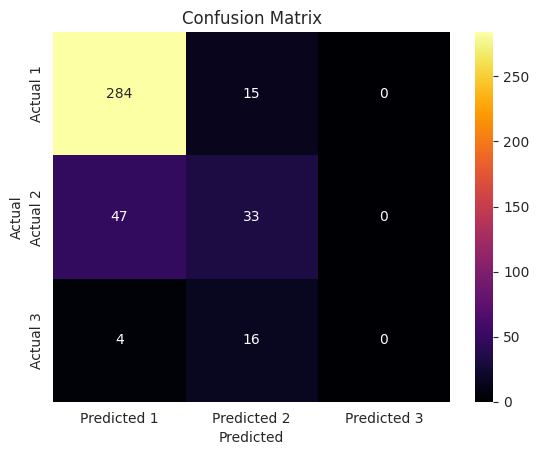

In [102]:
y_pred=dt_classifier.predict(X_test.values)
cm_plot(y_test,y_pred)

#***3. Adaboost***

## **_3.1 Implementation of the Model_**

In [103]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []
        self.epsilon = 1e-10
    def fit(self, df):
        # Extract features and target column
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        # Initialize weights for samples
        weights = np.ones(len(y)) / len(y)

        for _ in range(self.n_estimators):
            # Train a weak learner
            model = self._train_weak_learner(X, y, weights)
            predictions = model.predict(X)

            # Calculate weighted error
            error = np.sum(weights * (predictions != y))

            # Calculate alpha (weight for the weak learner)
            alpha = 0.5 * np.log((1 - error + self.epsilon) / (error + self.epsilon))

            # Update sample weights
            weights *= np.exp(-alpha * y * predictions)
            weights /= np.sum(weights)

            # Store the weak learner and its weight
            self.models.append(model)
            self.alphas.append(alpha)

    def _train_weak_learner(self, X, y, weights):

        from sklearn.tree import DecisionTreeClassifier

        model = DecisionTreeClassifier(max_depth=1)
        model.fit(X, y, sample_weight=weights)

        return model

    def predict(self, X):
        # Make predictions using the ensemble of weak learners
        predictions = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            predictions += alpha * model.predict(X)

        return np.sign(predictions)

    def accuracy(self, X, y):
        # Calculate accuracy of the ensemble on the given dataset
        predictions = self.predict(X)
        correct_predictions = np.sum(predictions == y)
        total_samples = len(y)
        accuracy = correct_predictions / total_samples
        return accuracy


AdaBoost_model = AdaBoost(n_estimators=3)
AdaBoost_model.fit(train_df)

# Assuming 'test_df' is your test DataFrame with the target column as the last column
test_accuracy = AdaBoost_model.accuracy(test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values)
print(f"Test Accuracy: {test_accuracy}")
pred=AdaBoost_model.predict(X_test)

Test Accuracy: 0.7493734335839599


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## **_3.2 Insights drawn (plots, markdown explanations)_**

##Confusion Matrix Calculation

In [104]:
def conf_mat(y_true, y_pred):
    conf_matrix = np.zeros((3, 3), dtype=int)

    for i in range(1, 4):  # Assuming classes are from 1 to 3
        for j in range(1, 4):
            conf_matrix[i - 1][j - 1] = np.sum((y_true == i) & (y_pred == j))

    return conf_matrix

def cm_plot(y_test, y_pred):
    # Calculate confusion matrix
    confusion_matrix = conf_mat(y_test, y_pred)

    # Plotting
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='inferno',
                xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3'],
                yticklabels=['Actual 1', 'Actual 2', 'Actual 3'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


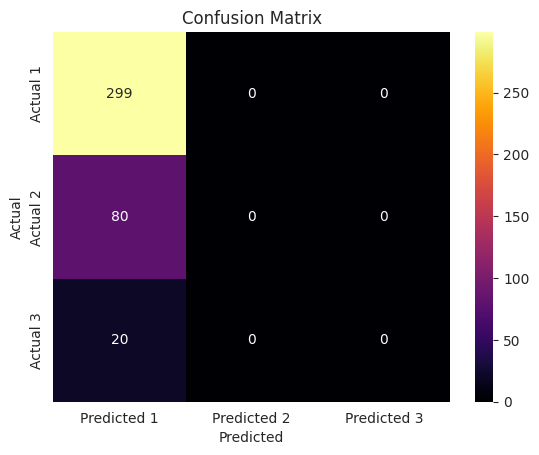

In [105]:
y_pred=AdaBoost_model.predict(X_test)
cm_plot(y_test,y_pred)

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

In [106]:
import numpy as np

class MulticlassSVM:
    def __init__(self, learning_rate=0.01, epochs=1000, regularization_strength=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization_strength = regularization_strength
        self.weights = None
        self.classes = None

    def fit(self, df):
        # Extract features and target column
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        # Get unique classes
        self.classes = np.unique(y)

        # Initialize weights for each class
        self.weights = {c: np.zeros(X.shape[1]) for c in self.classes}

        # Train a binary classifier for each class using one-vs-all strategy
        for c in self.classes:
            binary_labels = np.where(y == c, 1, -1)
            weights = self._train_binary_classifier(X, binary_labels)
            self.weights[c] = weights

    def _train_binary_classifier(self, X, binary_labels):
        # Initialize weights and bias
        weights = np.zeros(X.shape[1])
        bias = 0

        for epoch in range(self.epochs):
            # Update weights and bias using gradient descent
            gradient = self._gradient(X, binary_labels, weights, bias)
            weights -= self.learning_rate * gradient[0]
            bias -= self.learning_rate * gradient[1]

            # Apply regularization
            weights -= self.learning_rate * self.regularization_strength * weights

        return weights

    def _gradient(self, X, y, weights, bias):
        # Calculate gradient of the hinge loss with respect to weights and bias
        hinge_loss = 1 - y * (np.dot(X, weights) + bias)
        hinge_loss[hinge_loss < 0] = 0
        hinge_loss_derivative = np.where(hinge_loss > 0, -y, 0)

        # Compute gradients
        gradient_weights = np.dot(hinge_loss_derivative, X) / len(y)
        gradient_bias = np.sum(hinge_loss_derivative) / len(y)

        return gradient_weights, gradient_bias

    def predict(self, X):
        # Predict the class with the highest score
        scores = {c: np.dot(X, self.weights[c]) for c in self.classes}
        predictions = np.array([max(scores, key=lambda k: scores[k][i]) for i in range(X.shape[0])])

        return predictions

    def accuracy(self, X, y):
        predictions = self.predict(X)
        correct_predictions = np.sum(predictions == y)
        total_samples = len(y)
        accuracy = correct_predictions / total_samples
        return accuracy

# Example usage:
# Assuming 'df' is your DataFrame with the target column as the last column
MultiClassSVM_model = MulticlassSVM()
MultiClassSVM_model.fit(train_df)

test_accuracy = MultiClassSVM_model.accuracy(test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values)
print(f"Test Accuracy: {test_accuracy}")


predictions=MultiClassSVM_model.predict(X_test)

Test Accuracy: 0.7167919799498746


##Confusion Matrix Calculation

## **_4.2 Insights drawn (plots, markdown explanations)_**

In [107]:
def conf_mat(y_true, y_pred):
    conf_matrix = np.zeros((3, 3), dtype=int)

    for i in range(1, 4):  # Assuming classes are from 1 to 3
        for j in range(1, 4):
            conf_matrix[i - 1][j - 1] = np.sum((y_true == i) & (y_pred == j))

    return conf_matrix

def cm_plot(y_test, y_pred):
    # Calculate confusion matrix
    confusion_matrix = conf_mat(y_test, y_pred)

    # Plotting
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='inferno',
                xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3'],
                yticklabels=['Actual 1', 'Actual 2', 'Actual 3'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

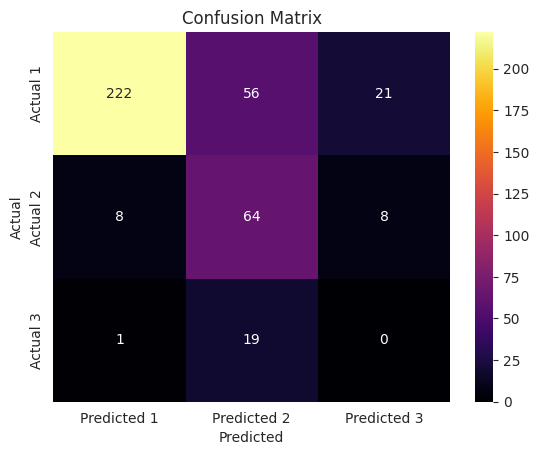

In [108]:
y_pred=MultiClassSVM_model.predict(X_test)
cm_plot(y_test,y_pred)

##This is how our model generalizes and performs on unseen data.

**1)Decision Tree Model with Entropy Implementation:**

Training Phase: In this phase, the decision tree is constructed using a
dataset. At each node, the feature that provides the highest information gain (reduction in entropy) is chosen to split the data.

Generalization: Decision trees tend to overfit the training data if not pruned properly. To generalize well, pruning techniques like cost-complexity pruning can be applied, which removes nodes that do not significantly improve the tree's performance on unseen data.

Performance on Unseen Data: A well-pruned decision tree can perform well on unseen data, making predictions based on the learned rules. However, if the tree is overfit, it may not generalize effectively and might perform poorly on new data.

**2)Adaboost (Adaptive Boosting):**

Training Phase: Adaboost combines multiple weak classifiers (often decision stumps) to create a strong ensemble classifier. In each iteration, it assigns higher weights to the misclassified samples from the previous iteration, allowing subsequent classifiers to focus on the previously misclassified data points.

Generalization: Adaboost tends to generalize well because it gives more attention to difficult-to-classify instances. It keeps iterating until it performs well on the training data or a predefined number of iterations is reached.

Performance on Unseen Data: Adaboost can perform well on unseen data if it successfully captures the underlying patterns in the training data. However, it can be sensitive to noisy data and outliers, which might negatively impact its performance.

**3)Multiclass Support Vector Machine (SVM) Model:**

Training Phase: Multiclass SVM aims to find a hyperplane that best separates data points belonging to different classes while maximizing the margin. This can be done using various techniques, including one-vs-one or one-vs-all strategies.

Generalization: SVMs are known for their good generalization properties, as they find the optimal hyperplane that maximizes the margin between classes. Regularization parameters like C can be tuned to control overfitting.

Performance on Unseen Data: SVMs often perform well on unseen data, provided the model parameters are well-tuned and the feature representation is appropriate. They are effective in handling high-dimensional data and are robust to outliers.

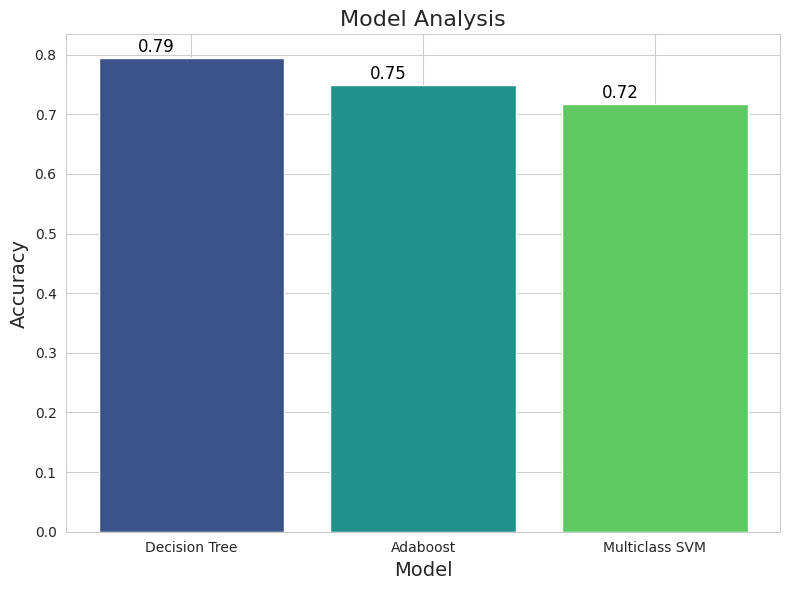

In [109]:
import seaborn as sns

categories = ['Decision Tree', 'Adaboost', 'Multiclass SVM']
values = [0.7944862155388471, 0.7493734335839599, 0.7167919799498746]

# Set a Seaborn style
sns.set_style("whitegrid")

# Create a bar graph with specific colors
colors = sns.color_palette('viridis', len(categories))  # Using a color palette
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=colors)

# Add data labels on each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, round(value, 2), ha='center', color='black', fontsize=12)

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Analysis', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


The Decision Tree model outperforms both Adaboost and Multiclass SVM, achieving the highest accuracy of around 79.45%. Adaboost follows closely with an accuracy of about 74.94%. However, Multiclass SVM lags behind the other models, showing an accuracy of approximately 71.68%. Overall, the Decision Tree model demonstrates superior predictive capabilities in this analysis.

# **_5. References_**

1.   https://medium.com/@curryrowan/adaboost-explained-92408a6713da
2.   https://towardsdatascience.com/ml-from-scratch-decision-tree-c6444102436a
3.   https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/
4.   https://www.baeldung.com/cs/svm-multiclass-classification

